# Dealing with Spin in PyProcar fermi2D

This tutorial provides a comprehensive guide to handling different spin configurations when plotting 2D Fermi surfaces using PyProcar's `fermi2D` function. Understanding how PyProcar handles spin is crucial for correctly interpreting and visualizing electronic structure at the Fermi level in magnetic materials.

## Understanding Spin in 2D Fermi Surface Analysis

PyProcar's `fermi2D` function handles spin differently depending on the type of magnetic calculation:

### Spin-Polarized Case
In spin-polarized calculations (collinear magnetism), the spin-up and spin-down channels are separate entities. This means:
- There are **two distinct spin channels** (spin-up and spin-down)
- Each spin channel has its own Fermi surface topology
- Each spin channel has its own corresponding orbital projections
- The Fermi surfaces for different spins can be plotted with different colors or line styles
- You can analyze spin-up and spin-down Fermi surfaces independently
- Total electronic properties = Properties(spin-up) + Properties(spin-down)

### Non-Collinear Case  
In non-collinear magnetic calculations, the situation is more complex:
- Spin-up and spin-down can **no longer be treated in isolation**
- There is only **1 spin channel** (the total system)
- However, there are **4 spin projections** corresponding to:
  - **Total magnetization** (scalar)
  - **sx** (x-component of spin)
  - **sy** (y-component of spin) 
  - **sz** (z-component of spin)
- These projections provide information about the local magnetic moments and their orientations
- **Spin texture** visualization becomes crucial for understanding the magnetic character of the Fermi surface

### Key fermi2D Modes for Spin Analysis
- **`plain`**: Basic Fermi surface contours for each spin channel
- **`parametric`**: Fermi surface with orbital/atomic projections per spin
- **`spin_texture`**: Visualization of spin orientation vectors on the Fermi surface
- **`plain_bands`**: Individual band contributions to the Fermi surface

This tutorial will demonstrate how to plot and analyze 2D Fermi surfaces for both cases.



## 1. Setup and Data Loading


In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
SPIN_POL_PATH = "data/examples/fermi2d/spin-polarized"
NON_COLLINEAR_PATH = "data/examples/fermi2d/non-colinear"
pyprocar.download_from_hf(relpath=SPIN_POL_PATH, output_path=CURRENT_DIR)
pyprocar.download_from_hf(relpath=NON_COLLINEAR_PATH, output_path=CURRENT_DIR)
SPIN_POL_DATA_DIR = CURRENT_DIR / SPIN_POL_PATH
NON_COLLINEAR_DATA_DIR = CURRENT_DIR / NON_COLLINEAR_PATH
print(f"Data downloaded to: {SPIN_POL_DATA_DIR}")
print(f"Data downloaded to: {NON_COLLINEAR_DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\spin-polarized
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\non-colinear
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\02-fermi2d\data\examples\fermi2d\non-colinear


## 2. Spin-Polarized Fermi Surface Plotting

In this section, we'll explore how to plot spin-polarized 2D Fermi surfaces using different modes. Spin-polarized calculations provide separate Fermi surface topologies for spin-up and spin-down electrons.


### 2.1 Plain Mode - Basic Spin-Polarized Fermi Surface

In plain mode, PyProcar plots the Fermi surface contours without any orbital projections. For spin-polarized systems, this will show both spin channels, typically with different colors or line styles to distinguish between spin-up and spin-down contributions.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

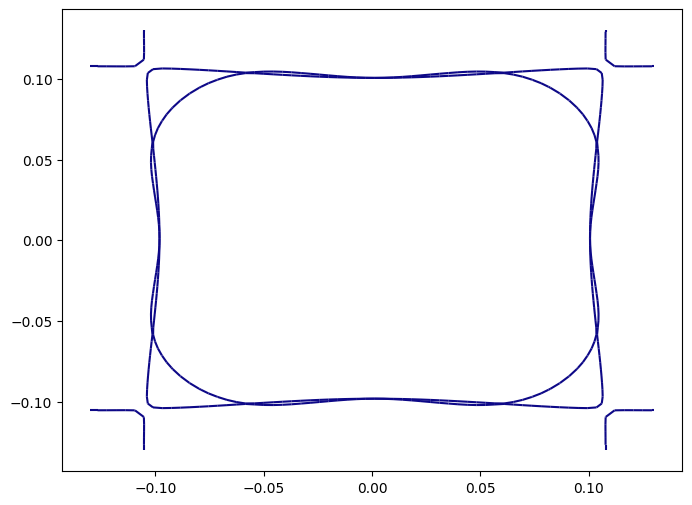

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [2]:
# Plot spin-polarized Fermi surface in plain mode
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    energy=0.0,  # Energy relative to Fermi level
)


**What you'll see in spin-polarized Fermi surface:**
- Fermi surface contours for both spin-up and spin-down channels
- kx and ky coordinates on the x and y axes
- Different colors or line styles for each spin channel
- Closed/open contours representing different Fermi surface topologies
- Spin channels differentiated by color (typically blue for spin-up, red for spin-down)

### 2.2 Customizing Spin-Polarized Fermi Surface

You can customize various aspects of the spin-polarized Fermi surface plot, including colors, line styles, and line widths.

In [3]:
# Plot customized spin-polarized Fermi surface
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    energy=0.0,
    color=['purple', 'green'],  # Custom colors for each spin channel
    linewidth=2.0,  # Customize linewidth for contours
    linestyle=['solid', 'dashed'],  # Customize linestyle for each spin channel
)

print("🎨 Customized spin-polarized Fermi surface with purple spin-up and green spin-down")

TypeError: fermi2D() got an unexpected keyword argument 'color'

### 2.3 Parametric Mode - Spin-Polarized Fermi Surface with Orbital Projections

In parametric mode, we can visualize the orbital character of the Fermi surface while maintaining the spin separation. This is particularly useful for understanding which orbitals contribute to the Fermi surface topology in each spin channel.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

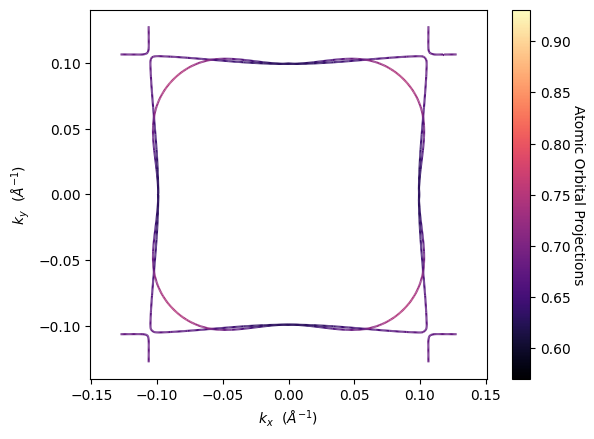

⚛️ Parametric Fermi surface showing d-orbital contributions to each spin channel


In [4]:
# Plot spin-polarized Fermi surface with d-orbital projections
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],  # Magnetic atom (often transition metal)
    orbitals=[4,5,6,7,8],  # d orbitals
    energy=0.0,
)

print("⚛️ Parametric Fermi surface showing d-orbital contributions to each spin channel")

### 2.4 Individual Spin Channels

You can also plot specific spin channels separately to focus on one particular spin state's Fermi surface topology.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

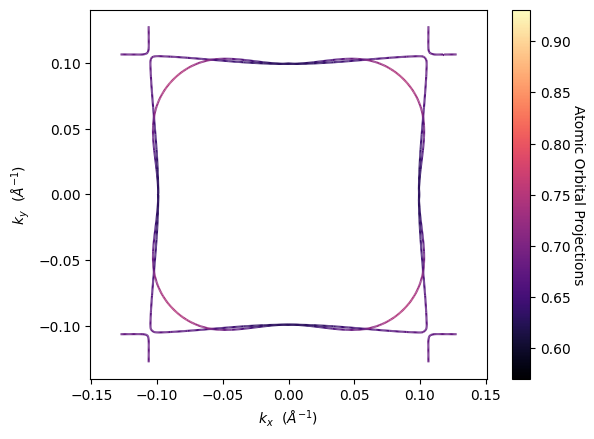

⬆️ Spin-up channel only: Focus on majority spin Fermi surface
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 10

RuntimeError: No bands to plot

In [5]:

# Plot only spin-up Fermi surface channel
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    spins=[0],  # Only spin-up (index 0)
    energy=0.0,
    verbose=3,
)

print("⬆️ Spin-up channel only: Focus on majority spin Fermi surface")

# Plot only spin-down Fermi surface channel
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    spins=[1],  # Only spin-down (index 1)
    energy=0.0,
    verbose=3,
)

print("⬇️ Spin-down channel only: Focus on minority spin Fermi surface")


## 3. Non-Collinear Fermi Surface Plotting

In non-collinear magnetic systems, the spin quantization axis is not fixed, and spin-up and spin-down states are mixed. PyProcar handles this by providing spin projections (total, sx, sy, sz) that help understand the local magnetic character of the Fermi surface, and most importantly, **spin texture** visualization becomes available.


### 3.1 Plain Mode - Non-Collinear Fermi Surface

First, let's plot the basic Fermi surface without any spin projections to see the overall electronic structure at the Fermi level:


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

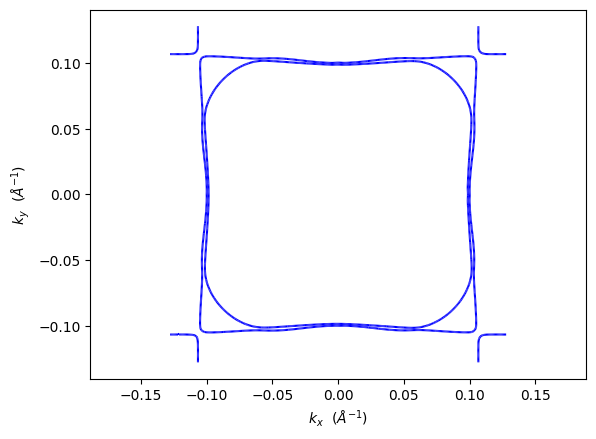

🧲 Non-collinear Fermi surface: Single channel with mixed spin states


In [6]:
# Plot non-collinear Fermi surface in plain mode
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    energy=0.0,
)

print("🧲 Non-collinear Fermi surface: Single channel with mixed spin states")


### 3.2 Spin Projections - Total Magnetization

In non-collinear systems, there are four spin projections available. These help understand the magnetic character of different regions on the Fermi surface.

**Available spin projections:**
- **Total magnetization**: `spins=[0]` - Overall magnetic density on Fermi surface
- **Sx magnetization**: `spins=[1]` - x-component of local magnetic moments  
- **Sy magnetization**: `spins=[2]` - y-component of local magnetic moments
- **Sz magnetization**: `spins=[3]` - z-component of local magnetic moments


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

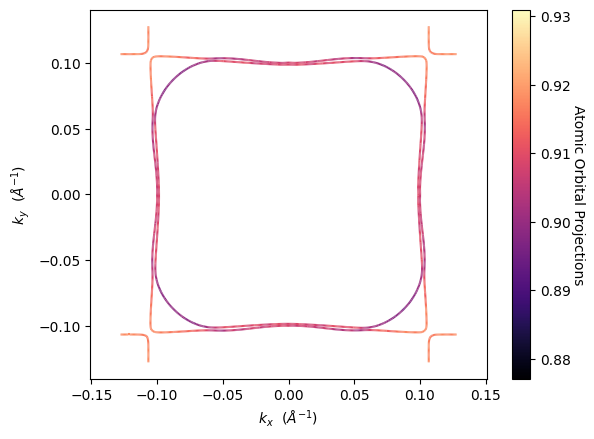

🎯 Total magnetization: Shows overall magnetic character of Fermi surface


In [7]:
# Plot Fermi surface with total magnetization projection
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[0],  # Total magnetization
    energy=0.0,
)

print("🎯 Total magnetization: Shows overall magnetic character of Fermi surface")

### 3.3 Spin Component Projections

We can also visualize the individual spin components (sx, sy, sz) to understand which regions of the Fermi surface contribute to different spatial orientations of the magnetic moments:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

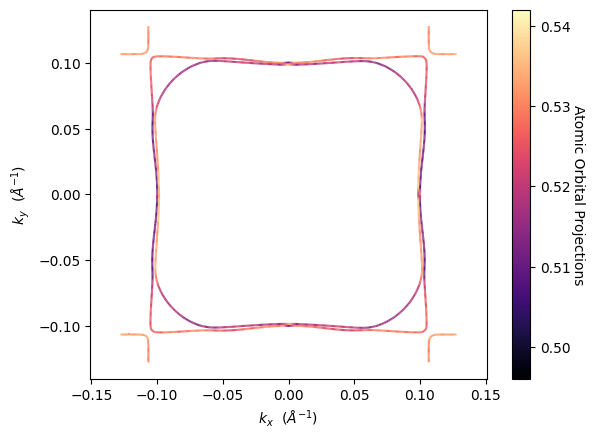

↔️ Sx component: Magnetic moments oriented along x-direction


In [8]:
# Plot Fermi surface with sx component (x-direction spin)
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[1],  # Sx component
    energy=0.0,
)

print("↔️ Sx component: Magnetic moments oriented along x-direction")

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

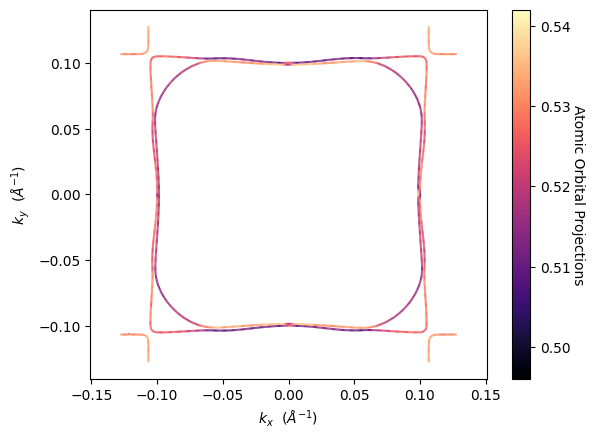

↕️ Sy component: Magnetic moments oriented along y-direction


In [9]:
# Plot Fermi surface with sy component (y-direction spin)
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[2],  # Sy component
    energy=0.0,
)

print("↕️ Sy component: Magnetic moments oriented along y-direction")


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

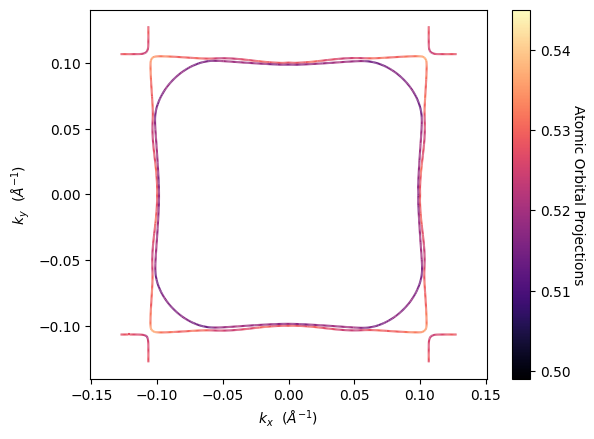

🔼 Sz component: Magnetic moments oriented along z-direction


In [10]:
# Plot Fermi surface with sz component (z-direction spin)
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[3],  # Sz component
    energy=0.0,
)

print("🔼 Sz component: Magnetic moments oriented along z-direction")

### 3.4 Spin Texture Mode

The **spin texture** mode is unique to fermi2D and one of its most powerful features for non-collinear magnetic systems. It visualizes the **orientation and magnitude of spin vectors** directly on the Fermi surface, providing unprecedented insight into the magnetic texture of the electronic states.

**Key features of spin texture mode:**
- **Arrows/vectors** show the direction of local magnetic moments
- **Arrow size** represents the magnitude of the magnetic moment
- **Arrow color** can represent different spin projections
- **Arrow density** controls how many vectors are displayed
- Perfect for understanding **topological properties** and **magnetic domains**


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

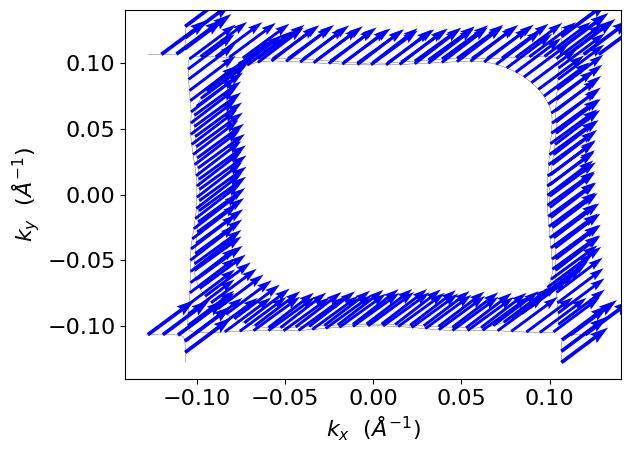

🌪️ Spin texture: Arrows show spin orientation on Fermi surface


In [14]:
# Plot Fermi surface with spin texture - basic version
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    spin_texture=True,
    fermi=5.3017,
    energy=0.0,
    arrow_size=0.5,
    arrow_density=5,
    spin_projection='x',
    arrow_color='blue',
)

print("🌪️ Spin texture: Arrows show spin orientation on Fermi surface")



#### Available Spin Projections

The `spin_projection` parameter in spin texture mode controls how the spin information is mapped to the arrow colors. Here are all available options:

| **Spin Projection** | **Description** | **Use Case** |
|---------------------|-----------------|--------------|
| `"x"` | X-component of spin vector (Sx) | Visualize spin orientation along x-axis |
| `"y"` | Y-component of spin vector (Sy) | Visualize spin orientation along y-axis |
| `"z"` | Z-component of spin vector (Sz) | Visualize spin orientation along z-axis |
| `"x^2"` | Square of X-component (Sx²) | Emphasize x-component magnitude |
| `"y^2"` | Square of Y-component (Sy²) | Emphasize y-component magnitude |
| `"z^2"` | Square of Z-component (Sz²) | Emphasize z-component magnitude (default) |

**Notes:**
- The **squared projections** (`x^2`, `y^2`, `z^2`) always give positive values and emphasize regions with strong spin character
- The **linear projections** (`x`, `y`, `z`) can be positive or negative, showing both magnitude and direction
- `"z^2"` is the default and often most useful for out-of-plane magnetic systems
- For in-plane magnetic systems, `"x"` or `"y"` may be more appropriate

### 3.5 Advanced Spin Texture Customization

The spin texture mode offers several parameters to customize the visualization:

**Key Parameters:**
- `arrow_size`: Controls the size/length of spin arrows (default: 3)
- `arrow_density`: Controls how many arrows are displayed (default: 10)
- `arrow_color`: Fixed color for all arrows (overrides spin_projection coloring)
- `no_arrow`: Use scatter points instead of arrows (default: False)
- `marker`: Marker style when using `no_arrow=True` (default: '.')
- `cmap`: Colormap for spin projection coloring (default: 'jet')
- `plot_color_bar`: Show color bar legend (default: False)


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

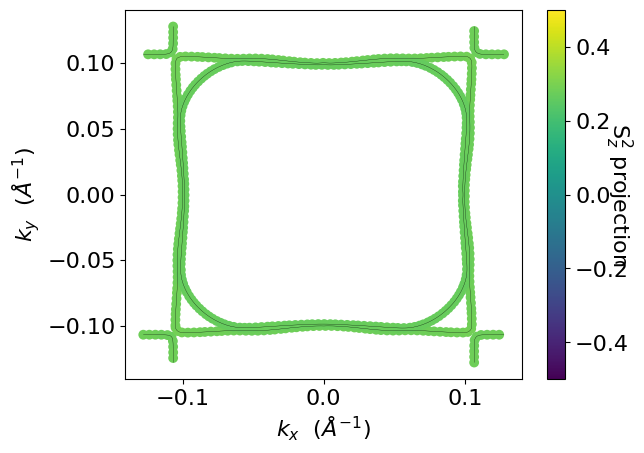

⚫ Scatter plot style showing z² spin projection


In [19]:
# Scatter plot style (no arrows)
pyprocar.fermi2D(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    spin_texture=True,
    fermi=5.3017,
    energy=0.0,
    no_arrow=True,  # Use scatter points instead of arrows
    marker='o',  # Circle marker
    spin_projection='z^2',
    plot_color_bar=True,
    cmap='viridis',
)

print("⚫ Scatter plot style showing z² spin projection")


## 4. Additional fermi2D Modes for Spin Analysis

Beyond the basic modes we've covered, fermi2D offers additional specialized modes for detailed spin-dependent analysis:

### 4.1 Plain Bands Mode

The `plain_bands` mode shows individual band contributions to the Fermi surface, which is particularly useful for understanding which specific bands contribute to each spin channel.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

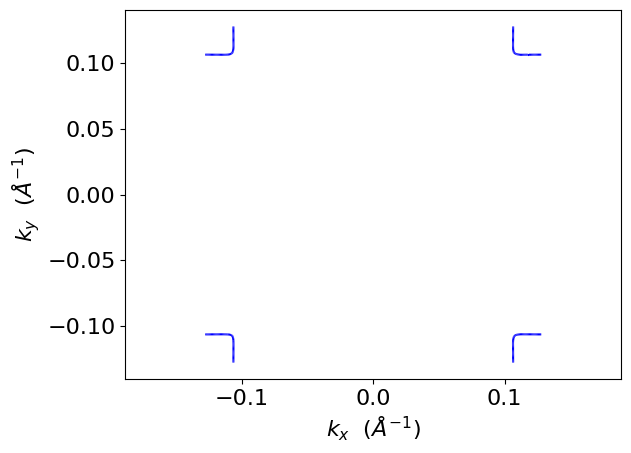

In [20]:
# Plot individual bands for spin-polarized system
pyprocar.fermi2D(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain_bands',
    fermi=5.3017,
    energy=0.0,
    band_indices=[[16], []],  # Same bands for both spins
    band_colors=[['blue', 'cyan', 'navy'], ['red', 'pink', 'darkred']],  # Different colors per spin
)


## 5. Summary and Best Practices

This tutorial has covered the comprehensive functionality of PyProcar's `fermi2D` function for analyzing spin-polarized and non-collinear magnetic systems:

### Key Takeaways:

#### For Spin-Polarized Systems:
- Use `mode='plain'` for basic Fermi surface topology comparison between spins
- Use `mode='parametric'` to understand orbital contributions to each spin channel
- Use `spins=[0]` or `spins=[1]` to focus on individual spin channels
- Customize appearance with `color`, `linewidth`, and `linestyle` parameters

#### For Non-Collinear Systems:
- Use `mode='plain'` for overall Fermi surface structure
- Use `mode='parametric'` with `spins=[0,1,2,3]` to analyze different spin projections
- **Use `mode='spin_texture'`** for the most detailed magnetic analysis
- Choose appropriate `spin_projection` values based on your magnetic system:
  - `'z^2'` (default): Good for out-of-plane magnetism
  - `'x'`, `'y'`, `'z'`: Shows directional components with sign
  - `'x^2'`, `'y^2'`: Emphasizes in-plane magnetic character

#### Best Practices:
1. **Start with `plain` mode** to understand overall Fermi surface topology
2. **Use `parametric` mode** to identify important orbitals/atoms
3. **Use `spin_texture` mode** for detailed magnetic analysis in non-collinear systems
4. **Adjust `arrow_density` and `arrow_size`** for optimal visualization
5. **Use `plot_color_bar=True`** to understand the color scale
6. **Compare different `spin_projection` values** to get complete picture

### fermi2D vs Other Methods:
- **fermi2D** provides unique **2D cross-sections** of the Fermi surface
- **Spin texture mode** is exclusive to fermi2D and invaluable for magnetic systems
- Perfect complement to 3D Fermi surface analysis for detailed k-space studies
